In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

np.random.seed(8315)

In [84]:
df = pd.read_csv('../datasets/famcs_students.csv')
print(df.head())
print("\nИнформация о наборе данных:")
df.info()

   cource  group                  stream sex   age   ss          interest  \
0       4     11  Прикладная информатика   М  20.0  Нет        Математика   
1       4     11  Прикладная информатика   Ж  20.0  Нет  Программирование   
2       4     11  Прикладная информатика   Ж  19.0  Нет  Программирование   
3       4     11  Прикладная информатика   Ж  20.0  Нет        Математика   
4       4     11  Прикладная информатика   М  20.0  Нет        Математика   

        os weekend_study bad_sleep  ...      social  \
0    MacOS            Да        Да  ...  Экстраверт   
1    MacOS           Нет       Нет  ...  Экстраверт   
2    MacOS            Да       Нет  ...  Экстраверт   
3    MacOS            Да        Да  ...  Экстраверт   
4  Windows            Да       Нет  ...   Интроверт   

                       sport  miss  study_form foot_size eye_color score  \
0  Редко, легкая физкультура   3.0      Бюджет      48.0     Карие   9.2   
1            Да, я спортсмен   5.0      Бюджет      39

In [85]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']

N = 9
target_col = binary_cols[N % 8]
print(f"Целевая переменная (y): {target_col}")

feature_cols = ['age', 'sex', 'height', 'score', 'miss', 'social', 'os']
print(f"Признаки (X): {feature_cols}")

data = df[feature_cols + [target_col]].copy()
data.dropna(inplace=True)

Целевая переменная (y): interest
Признаки (X): ['age', 'sex', 'height', 'score', 'miss', 'social', 'os']


In [86]:
binary_map = {'Математика': 1, 'Программирование': 0, 'М': 1, 'Ж': 0}
data['sex'] = data['sex'].map(binary_map)
data[target_col] = data[target_col].map(binary_map)

data = pd.get_dummies(data, columns=['social', 'os'], drop_first=True)

print("Данные после предобработки:")
print(data.head())

X = data.drop(target_col, axis=1)
y = data[target_col]

Данные после предобработки:
    age  sex  height  score  miss  interest  social_Социофоб  \
0  20.0    1   192.0    9.2   3.0         1            False   
1  20.0    0   169.0    8.8   5.0         0            False   
2  19.0    0   190.0    8.8  10.0         0            False   
3  20.0    0   158.0    8.8   3.0         1            False   
4  20.0    1   187.0    9.0   1.0         1            False   

   social_Экстраверт  os_MacOS  os_Windows  
0               True      True       False  
1               True      True       False  
2               True      True       False  
3               True      True       False  
4              False     False        True  


In [87]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер валидационной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер тренировочной выборки: 88
Размер валидационной выборки: 19
Размер тестовой выборки: 20


In [88]:
scaler = StandardScaler()
numerical_cols = ['age', 'height', 'score', 'miss']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nПервые 5 строк тренировочной выборки после масштабирования:")
print(X_train.head())


Первые 5 строк тренировочной выборки после масштабирования:
          age  sex    height     score      miss  social_Социофоб  \
7   -0.294285    1  0.545531 -0.289528  0.273181            False   
1   -0.294285    0 -0.698546  0.925178 -0.378014            False   
89  -0.294285    1 -0.405822  0.317825  0.164649            False   
113 -0.294285    0 -1.357175  1.532532 -0.703612            False   
56  -0.294285    0 -1.649900  0.317825 -0.920677            False   

     social_Экстраверт  os_MacOS  os_Windows  
7                False     False        True  
1                 True      True       False  
89               False     False        True  
113               True     False        True  
56                True     False        True  


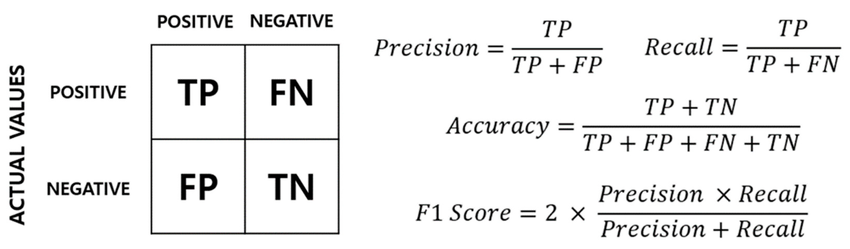

In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    # roc-auc корректна только для linreg
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Класс 0', 'Класс 1'],
                yticklabels=['Класс 0', 'Класс 1'])
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.show()

In [90]:
class Trivial:
    def fit(self, y_train):
        self.most_frequent_class = y_train.mode()[0]
        print(f"Тривиальный классификатор: самый частый класс = {self.most_frequent_class}")

    def predict(self, X):   
        return np.full(X.shape[0], self.most_frequent_class)

    def predict_proba(self, X):
        proba = np.zeros((X.shape[0], 2))
        proba[:, self.most_frequent_class] = 1.0
        return proba[:, 1]
    
trivial_clf = Trivial()
trivial_clf.fit(y_train)

Тривиальный классификатор: самый частый класс = 0


In [91]:
class Naive:
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def probdistfunc(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var + 1e-9))
        denominator = np.sqrt(2 * np.pi * var + 1e-9)
        return numerator / denominator

    def pred_log_prob(self, X):
        X = np.array(X, dtype=float)
        log_probas = np.zeros((X.shape[0], len(self._classes)))
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            likelihood = np.sum(np.log(self.probdistfunc(idx, X) + 1e-9), axis=1)
            log_probas[:, idx] = prior + likelihood
        return log_probas
    
    def predict_proba(self, X):
        log_probas = self.pred_log_prob(X)
        probas = np.exp(log_probas)
        return probas / probas.sum(axis=1, keepdims=True)

    def predict(self, X):
        log_probas = self.pred_log_prob(X)
        return self._classes[np.argmax(log_probas, axis=1)]


nb_clf = Naive()
nb_clf.fit(X_train.values, y_train.values)

In [92]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)
    
    def predict_proba(self, X):
        probas = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            proba_class_1 = sum(label == 1 for label in k_nearest_labels) / self.k
            probas.append(proba_class_1)
        return np.array(probas)


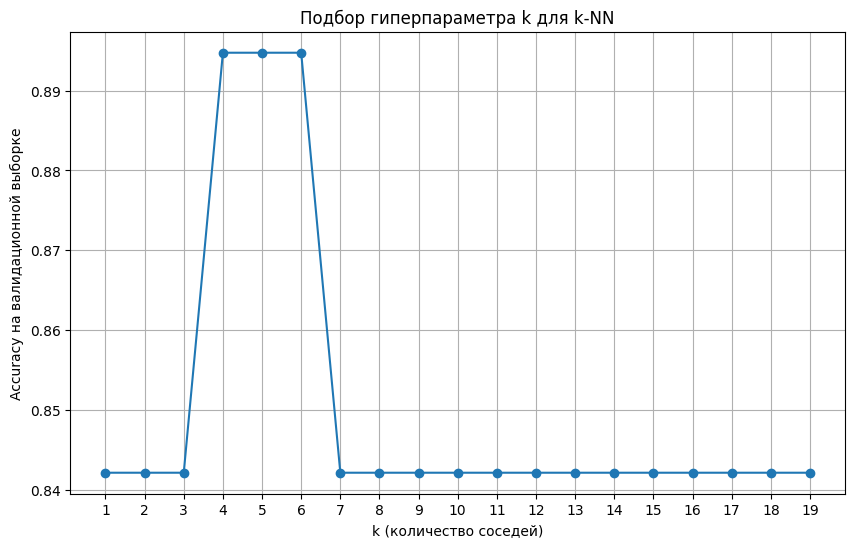


Оптимальное значение k: 4


In [93]:
k_values = range(1, 20, 1)
accuracies = []

for k in k_values:
    knn_clf = KNN(k=k)
    knn_clf.fit(X_train.values, y_train.values)
    y_val_pred = knn_clf.predict(X_val.values)
    accuracies.append(accuracy_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Подбор гиперпараметра k для k-NN')
plt.xlabel('k (количество соседей)')
plt.ylabel('Accuracy на валидационной выборке')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"\nОптимальное значение k: {best_k}")

knn_clf_best = KNN(k=best_k)
knn_clf_best.fit(X_train.values, y_train.values)

In [94]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_predicted_probs = self.predict_proba(X)
        y_predicted_labels = [1 if i > threshold else 0 for i in y_predicted_probs]
        return np.array(y_predicted_labels)
    
log_reg = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)
log_reg.fit(X_train.values, y_train.values)
print("Класс MyLogisticRegression исправлен, модель успешно обучена.")


Класс MyLogisticRegression исправлен, модель успешно обучена.


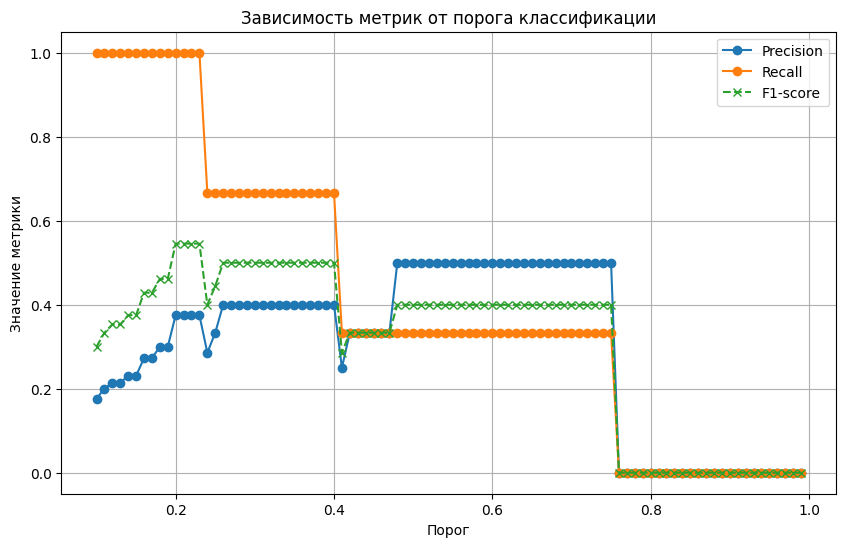


Оптимальный порог классификации: 0.20 с F1-мерой: 0.5455


In [95]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 1.0, 0.01)
f1_scores = []
precisions = []
recalls = []
y_val_proba = log_reg.predict_proba(X_val.values)

for thresh in thresholds:
    y_pred_thresh = (y_val_proba >= thresh).astype(int)
    f1 = f1_score(y_val, y_pred_thresh)
    prec = precision_score(y_val, y_pred_thresh, zero_division=0)
    rec = recall_score(y_val, y_pred_thresh, zero_division=0)
    
    f1_scores.append(f1)
    precisions.append(prec)
    recalls.append(rec)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='x', linestyle='--')
plt.title('Зависимость метрик от порога классификации')
plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)
plt.show()

best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"\nОптимальный порог классификации: {best_threshold:.2f} с F1-мерой: {f1_scores[best_threshold_idx]:.4f}")

Accuracy: 0.8000
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.5000


/home/wayzap/projects/bsu/oiad-3-2025/.venv/lib64/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


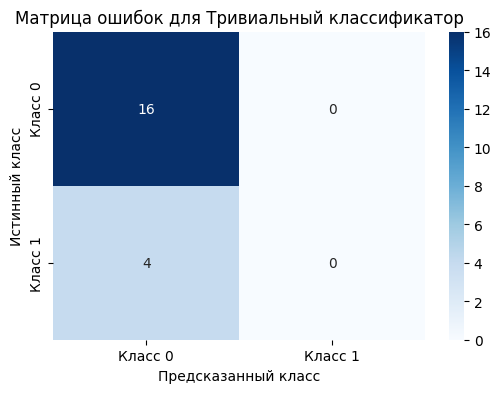

Accuracy: 0.6500
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.4844


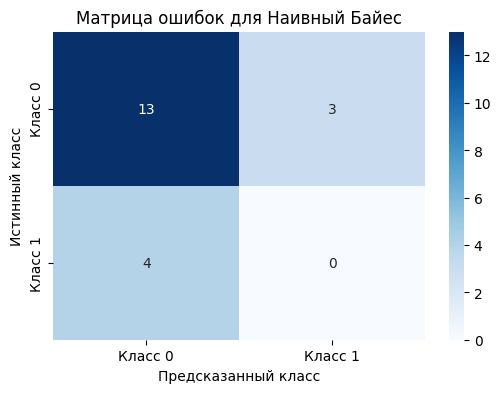

Accuracy: 0.7500
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.5781


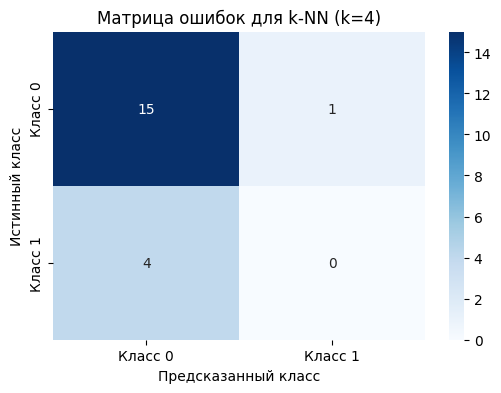

Accuracy: 0.5500
Precision: 0.1429
Recall: 0.2500
ROC-AUC: 0.5469


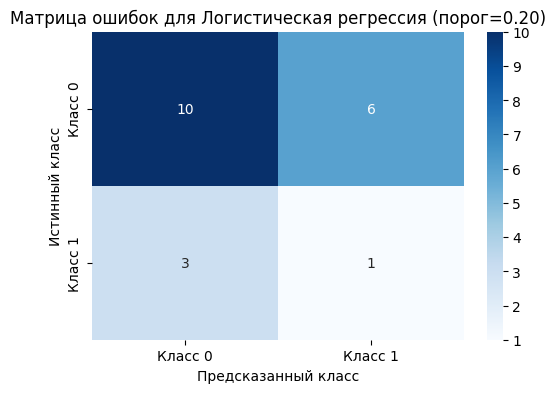

In [96]:
y_pred_trivial = trivial_clf.predict(X_test)
y_proba_trivial = trivial_clf.predict_proba(X_test)
evaluate_model(y_test, y_pred_trivial, y_proba_trivial, "Тривиальный классификатор")

y_pred_nb = nb_clf.predict(X_test.values)
y_proba_nb = nb_clf.predict_proba(X_test.values)[:, 1]
evaluate_model(y_test, y_pred_nb, y_proba_nb, "Наивный Байес")

y_pred_knn = knn_clf_best.predict(X_test.values)
y_proba_knn = knn_clf_best.predict_proba(X_test.values)
evaluate_model(y_test, y_pred_knn, y_proba_knn, f"k-NN (k={best_k})")

y_proba_log_reg = log_reg.predict_proba(X_test.values)
y_pred_log_reg = log_reg.predict(X_test.values, threshold=best_threshold)
evaluate_model(y_test, y_pred_log_reg, y_proba_log_reg, f"Логистическая регрессия (порог={best_threshold:.2f})")